### EDA & Feature Selection
EDA and feature selection has already been done in a separate file. A set of features suggested by the different ML algorithms
has already been compiled.

### Objective
The objective of this case study, is to showcase how a NN can be made used to perform a regression task. In the context of this particular objective, a dataset containing several features and its cost is used.

Data:
Windsor Housing Data from UCI Machine Learning Reposistory

### Import Basic Python Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Keras for Neural Networks
1. Import Standard Scaler for feature scaling
2. Import train_test_split for splitting data
3. Sequential is an easy method on how to build NN by layers sequentially
4. Dense is a general layer type; e.g of other types of layers: LSTM
5. EarlyStopping allows the NN to stop earlier than the specified Epoch through the use of patience,Patience is the extra number of epochs the model will run when validation loss score no longer improves
7. load_model allows saving of NN in h5 format

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import optimizers

Using TensorFlow backend.


### Cleaning Data

In [3]:
housing_data = pd.read_csv('Housing.csv')
housing_data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
housing_data = housing_data.drop(columns = ['Unnamed: 0'],axis=1)
housing_data.head(13)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
5,66000.0,4160,3,1,1,yes,yes,yes,no,yes,0,no
6,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
7,69000.0,4160,3,1,3,yes,no,no,no,no,0,no
8,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
9,88500.0,5500,3,2,4,yes,yes,no,no,yes,1,no


In [5]:
housing_data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [7]:
housing_data.shape

(546, 12)

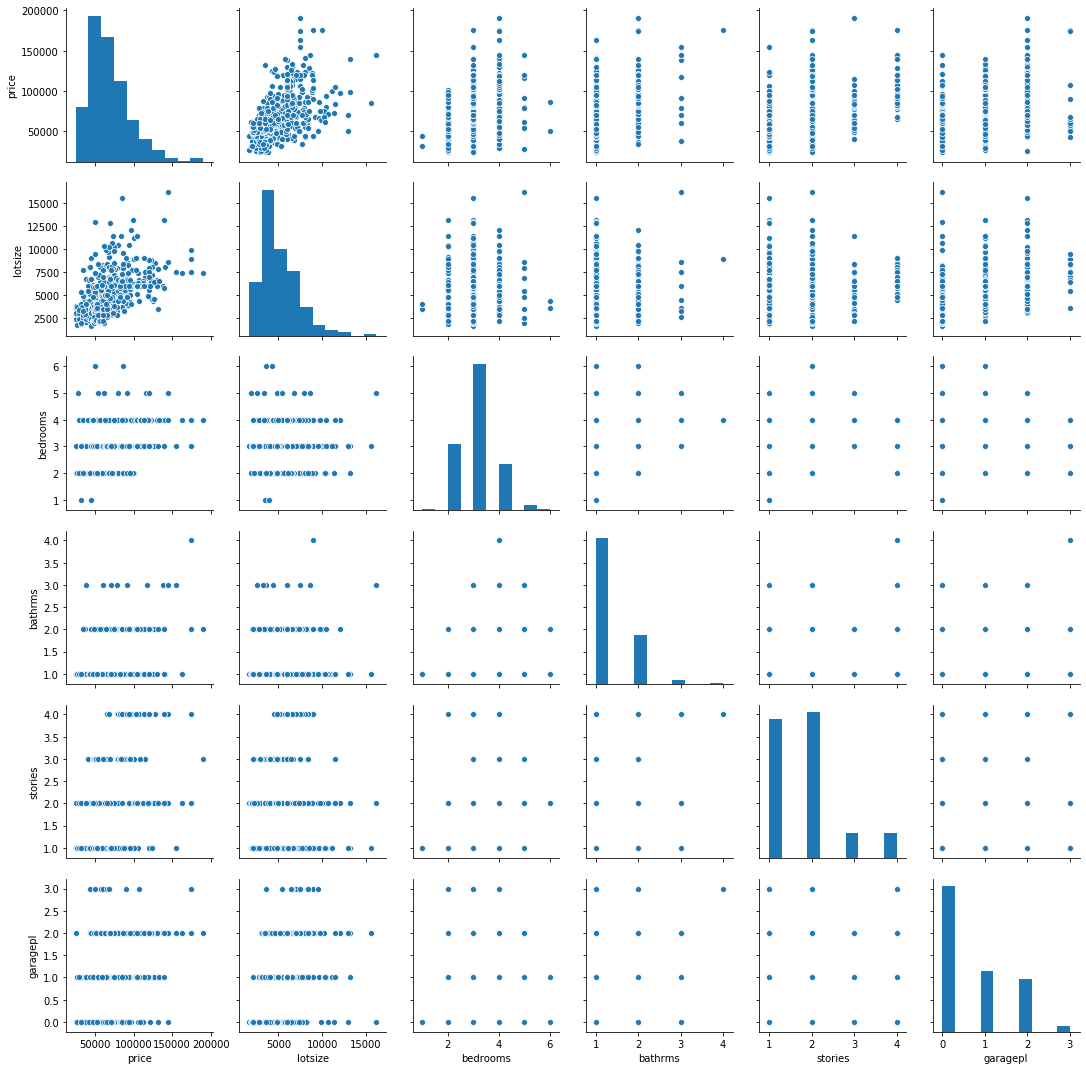

In [8]:
%matplotlib inline
_=sns.pairplot(housing_data)

### Splitting of Target (Price) into Classes
Reason for splitting into classes is due to imbalance data set for prices.
Having worked on the data set previously, val_loss = 2.7*10^8.This is when distribution is not accounted for in the training data_set. </p> This class splitting approach is to try to improve test results especially for larger housing price ranges, since only a few sparse examples exist.<p> Proposed class splitting into 4 clasess according to their quartile range.
   1. 0% > price <= 25% Class 1
   2. 25% > price <= 50% Class 2
   3. 50% > price <= 75% Class 3
   4. 75% > price <= 100% Class 4 

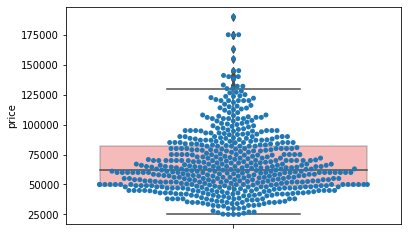

In [9]:
_=sns.swarmplot(y='price',data=housing_data)
_=sns.boxplot(y='price',data=housing_data,boxprops=dict(alpha=0.3),color='red')

In [10]:
housing_data.loc[housing_data['price']<=housing_data['price'].quantile(0.25),'Class'] ='Class 1'
housing_data.loc[(housing_data['price']>housing_data['price'].quantile(0.25)) & (housing_data['price']<= housing_data['price'].quantile(0.5)),'Class'] ='Class 2'
housing_data.loc[(housing_data['price']>housing_data['price'].quantile(0.5)) & (housing_data['price']<= housing_data['price'].quantile(0.75)),'Class'] ='Class 3'
housing_data.loc[(housing_data['price']>housing_data['price'].quantile(0.75)) & (housing_data['price']<= housing_data['price'].quantile(0.95)),'Class'] ='Class 4'
housing_data.loc[housing_data['price']>housing_data['price'].quantile(0.95),'Class'] ='Class 5'

housing_data

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,Class
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no,Class 1
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no,Class 1
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no,Class 2
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no,Class 2
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no,Class 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no,Class 4
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no,Class 4
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no,Class 4
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no,Class 4


In [11]:
housing_data['Class'].value_counts()

Class 2    138
Class 1    137
Class 3    135
Class 4    109
Class 5     27
Name: Class, dtype: int64

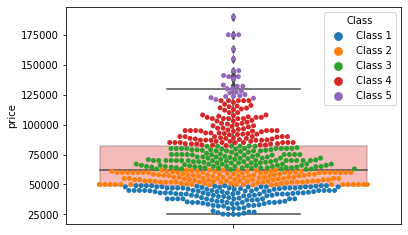

In [12]:
_=sns.swarmplot(y='price',x=['']*len(housing_data['Class']),hue='Class',data=housing_data)
_=sns.boxplot(y='price',data=housing_data,boxprops=dict(alpha=0.3),color='red')

### Define your Features and Target (Stratify Class)
1. Pre-process the categorical data to 1 and 0
2. Feature scaling of the all features except categorical ones, especially due to the large range
of values from lot_siz


In [13]:
Binary_Features = housing_data[['driveway','recroom','fullbase','gashw','airco','prefarea','Class']]
Int_Features = housing_data[['bedrooms', 'bathrms','stories','garagepl']]
Cont_Features = housing_data[['lotsize']]
Target=housing_data['price']
print(Binary_Features,Int_Features,Cont_Features,Target)

    driveway recroom fullbase gashw airco prefarea    Class
0        yes      no      yes    no    no       no  Class 1
1        yes      no       no    no    no       no  Class 1
2        yes      no       no    no    no       no  Class 2
3        yes     yes       no    no    no       no  Class 2
4        yes      no       no    no    no       no  Class 2
..       ...     ...      ...   ...   ...      ...      ...
541      yes     yes       no    no   yes       no  Class 4
542      yes      no       no    no   yes       no  Class 4
543      yes     yes       no    no   yes       no  Class 4
544      yes     yes       no    no   yes       no  Class 4
545      yes      no       no    no   yes       no  Class 4

[546 rows x 7 columns]      bedrooms  bathrms  stories  garagepl
0           3        1        2         1
1           2        1        1         0
2           3        1        1         0
3           3        1        2         0
4           2        1        1         0
..  

In [14]:
from sklearn.preprocessing import LabelEncoder
Lencoder = LabelEncoder()

In [15]:
Binary_Features.columns
Encoded_Binary_Features=[]

for i in Binary_Features.columns:
    Binary_Features_Temp = Lencoder.fit_transform(Binary_Features[i])
    Encoded_Binary_Features.append(Binary_Features_Temp)

Encoded_Binary_Features = pd.DataFrame(Encoded_Binary_Features,index = Binary_Features.columns)
Encoded_Binary_Features = Encoded_Binary_Features.T
Encoded_Binary_Features

,driveway,recroom,fullbase,gashw,airco,prefarea,Class
0,1,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,1
3,1,1,0,0,0,0,1
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
541,1,1,0,0,1,0,3
542,1,0,0,0,1,0,3
543,1,1,0,0,1,0,3
544,1,1,0,0,1,0,3


In [16]:
stdscaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

mmscaler = MinMaxScaler()
qtscaler = QuantileTransformer()
pscaler = PowerTransformer()
rscaler = RobustScaler()

Cont_Features = stdscaler.fit_transform(Cont_Features)
Cont_Features = pd.DataFrame(Cont_Features,columns=['lotsize'])
Int_Features = stdscaler.fit_transform(Int_Features)
Int_Features = pd.DataFrame(Int_Features,columns=['bedrooms', 'bathrms','stories','garagepl'])

In [17]:
Final_Scaled_Features = pd.concat([Cont_Features,Encoded_Binary_Features,Int_Features],axis=1)
print(Final_Scaled_Features,Target)

      lotsize  driveway  recroom  fullbase  gashw  airco  prefarea  Class  \
0    0.323028         1        0         1      0      0         0      0   
1   -0.531013         1        0         0      0      0         0      0   
2   -0.964958         1        0         0      0      0         0      1   
3    0.692343         1        1         0      0      0         0      1   
4    0.558466         1        0         0      0      0         0      1   
..        ...       ...      ...       ...    ...    ...       ...    ...   
541 -0.161698         1        1         0      0      1         0      3   
542  0.392275         1        0         0      0      1         0      3   
543  0.392275         1        1         0      0      1         0      3   
544  0.392275         1        1         0      0      1         0      3   
545  0.392275         1        0         0      0      1         0      3   

     bedrooms   bathrms   stories  garagepl  
0    0.047235 -0.569495  0.22

### Train_Test_Split with Stratify
1. Stratify = Classes created earlier, so as to ensure more even distribution of Class 5 prices during Training and Test
2. Drop the classes feature after ensuring that the dataset has been regularized

In [18]:
X_train,X_test,y_train,y_test = train_test_split(Final_Scaled_Features,Target,test_size=0.3,random_state=24,stratify=Final_Scaled_Features['Class'])
print(X_train['Class'].value_counts(),X_test['Class'].value_counts())

1    97
0    96
2    94
3    76
4    19
Name: Class, dtype: int64 2    41
1    41
0    41
3    33
4     8
Name: Class, dtype: int64


In [19]:
X_train = X_train.drop(columns='Class',axis=1)
X_test = X_test.drop(columns='Class',axis=1)
print(X_train,X_test)

      lotsize  driveway  recroom  fullbase  gashw  airco  prefarea  bedrooms  \
329  1.719501         1        0         0      0      0         0  0.047235   
11  -0.992657         0        0         0      0      0         0 -1.310147   
351  0.853918         1        0         1      0      0         0  0.047235   
487  1.361727         1        0         0      0      0         0 -1.310147   
429 -0.715670         1        0         1      0      1         1  0.047235   
..        ...       ...      ...       ...    ...    ...       ...       ...   
261 -0.697205         1        0         1      0      0         0  1.404617   
135  0.392275         1        0         0      0      0         0  1.404617   
94   1.338644         1        1         1      0      1         0  0.047235   
228  0.540462         1        0         1      0      1         0  0.047235   
287  0.600014         1        0         0      0      0         0  1.404617   

      bathrms   stories  garagepl  
329

### Define NN Architecture
1. Initial 2 hidden layer with 160 nodes brough about val_loss 2.2-2.4 * 10^8
2. Subsequent adding of additional hidden layers brought about minor improvements to val_loss in terms of 0.1*10^8
3. Improvements in val_loss stopped at 9th hidden layer, increament of hidden layers was done with the same node in each layer
4. Major improvement after FS of Int features,prior to Int FS, %Error on extreme low and high price examples were very large. Low price examples were significantly prominent due to having more examples
5. Current data set indicates a much smaller region of %Error at the price extremes

In [20]:
training_log_database=[]
   
#model_architecture
optimizer = optimizers.Nadam(lr=0.01)
model=Sequential()
input_layer_nodes=X_train.shape[1]
model.add(Dense(16,activation='relu',input_shape=(input_layer_nodes,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1))  

#model compile
earlystop = EarlyStopping(patience=5, verbose=1)
model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mae'])

#model fitting
training_history=model.fit(X_train,y_train,validation_split=0.3,epochs=200,callbacks=[earlystop])
training_log = pd.DataFrame.from_dict(training_history.history)
training_log['epochs']=np.arange(1,len(training_log)+1)
training_log=training_log[['epochs','loss','mean_absolute_error','val_loss','val_mean_absolute_error']]
#training_log_database.append(training_log)
training_log_database.append(training_log)
    
training_log_database= pd.concat(training_log_database,ignore_index=True)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 267 samples, validate on 115 samples
Epoch 1/200
267/267 [==============================] - 8s 29ms/step - loss: 5382473285.0337 - mean_absolute_error: 68436.5426 - val_loss: 5002021736.6261 - val_mean_absolute_error: 66060.9658
Epoch 2/200
267/267 [==============================] - 0s 433us/step - loss: 5082848624.1798 - mean_absolute_error: 66283.7130 - val_loss: 3553532736.5565 - val_mean_absolute_error: 55032.0099
Epoch 3/200
267/267 [==============================] - 0s 452us/step - loss: 1717240634.6067 - mean_absolute_error: 34708.7092 - val_loss: 503595268.1739 - val_mean_absolute_error: 17285.3756
Epoch 4/200
267/267 [==============================] - 0s 423us/step - loss: 405271302.4719 - mean_absolute_error: 15814.7786 - val_loss: 339274874.7130 - val_mean_absolute_error: 14235.8092
Epoch 5/200
267/267 [==============================] - 0s 444us/s

In [21]:
training_log_database.loc[training_log_database['val_loss']==training_log_database['val_loss'].min()]

,epochs,loss,mean_absolute_error,val_loss,val_mean_absolute_error
7,8,2.951794e+08,13158.769882,2.958348e+08,12695.734851


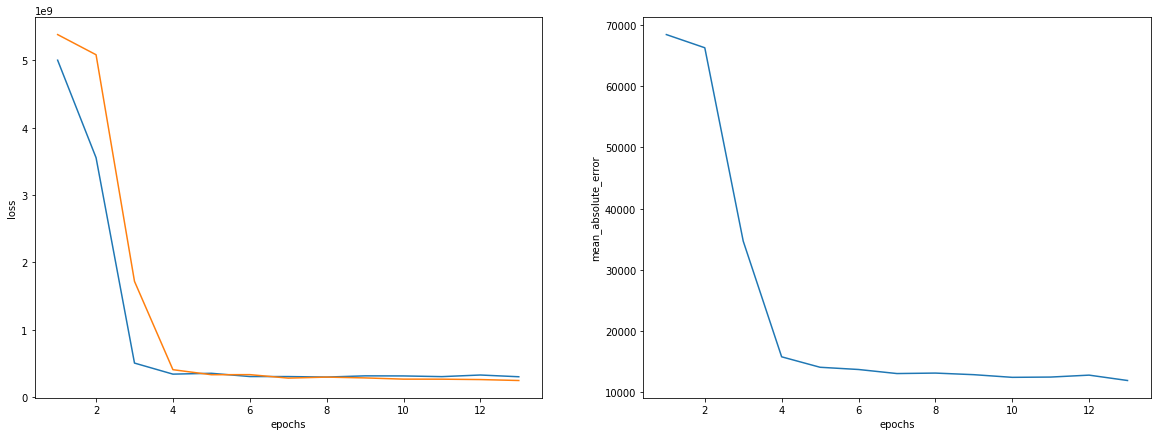

In [22]:
f,axes=plt.subplots(1,2,figsize=(20,7))
axes=axes.flatten()
_=sns.lineplot(y='val_loss',x='epochs',data=training_log_database,ax=axes[0])
_=sns.lineplot(y='loss',x='epochs',data=training_log_database,ax=axes[0])
_=sns.lineplot(y='mean_absolute_error',x='epochs',data=training_log_database,ax=axes[1])

### Training Data Performance

,lotsize,driveway,recroom,fullbase,gashw,airco,prefarea,bedrooms,bathrms,stories,garagepl,price,predicted_price
78,-1.034205,0,0,0,0,0,0,0.047235,-0.569495,-0.931157,-0.804525,25000.0,28737.093750
293,-0.600260,1,0,0,0,0,0,0.047235,-0.569495,0.221704,-0.804525,25000.0,43467.628906
223,-0.706438,1,0,0,0,0,0,-1.310147,-0.569495,-0.931157,-0.804525,25000.0,43271.339844
300,-1.269643,0,0,0,0,0,0,0.047235,-0.569495,-0.931157,-0.804525,25245.0,29198.375000
41,-0.992657,1,0,1,0,0,0,-1.310147,-0.569495,-0.931157,1.519658,26000.0,48401.695312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,5.101041,1,0,0,0,0,0,2.761999,3.416969,0.221704,-0.804525,145000.0,121874.273438
80,1.583316,1,0,0,0,1,1,1.404617,3.416969,2.527427,1.519658,145000.0,150871.515625
297,1.047809,1,1,1,0,1,0,1.404617,-0.569495,0.221704,1.519658,163000.0,97509.828125
40,1.084740,1,0,1,0,1,1,1.404617,1.423737,0.221704,2.681750,174500.0,130255.453125


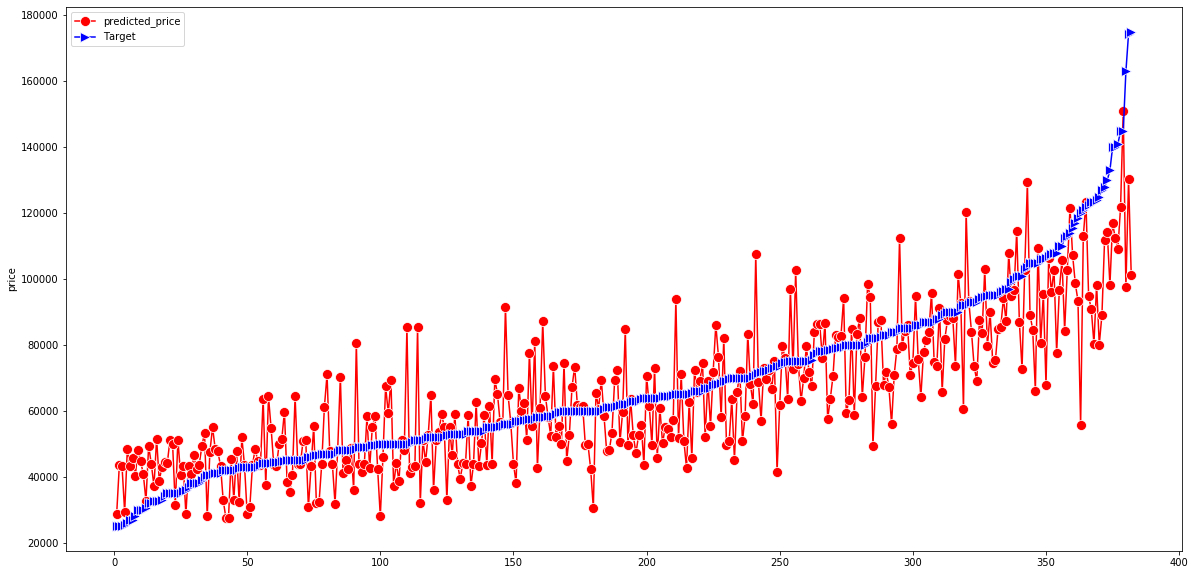

In [23]:
training_results = pd.concat([X_train,y_train],axis=1).reset_index(drop=True)
training_predictions = pd.DataFrame(model.predict(X_train),columns=['predicted_price'])
training_results = pd.concat([training_results,training_predictions],axis=1)

training_results = training_results.sort_values(by=['price'])
plt.figure(figsize=(20,10))
_=sns.lineplot(y='predicted_price',x=np.arange(1,len(training_results)+1,1),data=training_results,markers=True,marker='o',color='red',ms=10,label='predicted_price')
_=sns.lineplot(y='price',x=np.arange(1,len(training_results)+1,1),data=training_results,markers=True,marker='>',color='blue',ms=10,label='Target')
training_results

### Testing Data Performance

,lotsize,driveway,recroom,fullbase,gashw,airco,prefarea,bedrooms,bathrms,stories,garagepl,price,predicted_price
12,-0.997273,0,0,0,0,0,0,-1.310147,-0.569495,-0.931157,0.357567,26500.0,28185.072266
70,-0.697205,1,0,0,0,0,0,-1.310147,-0.569495,-0.931157,-0.804525,33500.0,43292.496094
72,-1.090987,1,0,0,0,0,0,1.404617,1.423737,0.221704,-0.804525,34000.0,56347.226562
7,-0.870783,1,0,0,0,0,0,-1.310147,-0.569495,-0.931157,-0.804525,34000.0,43025.058594
111,-0.699513,0,0,0,0,0,0,-1.310147,-0.569495,-0.931157,-0.804525,34400.0,32355.960938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,-0.761835,1,0,0,1,0,0,1.404617,1.423737,0.221704,1.519658,132000.0,90764.750000
53,0.392275,1,1,1,1,0,0,1.404617,3.416969,0.221704,1.519658,138300.0,132883.703125
55,1.084740,1,0,1,0,1,1,0.047235,3.416969,-0.931157,1.519658,155000.0,124986.421875
116,1.758740,1,0,0,0,1,0,1.404617,5.410201,2.527427,2.681750,175000.0,175943.468750


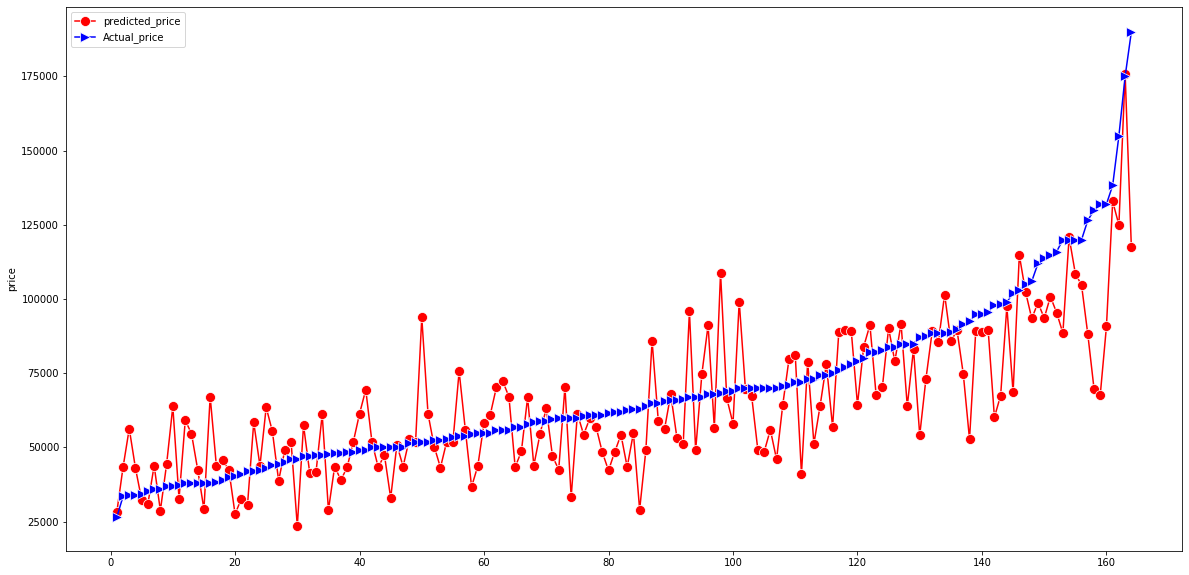

In [24]:
test_results = pd.concat([X_test,y_test],axis=1).reset_index(drop=True)
test_predictions = pd.DataFrame(model.predict(X_test),columns=['predicted_price'])
test_results = pd.concat([test_results,test_predictions],axis=1)
test_results = test_results.sort_values(by=['price'])

plt.figure(figsize=(20,10))
_=sns.lineplot(y='predicted_price',x=np.arange(1,len(test_results)+1,1),data=test_results,markers=True,marker='o',color='red',ms=10,label='predicted_price')
_=sns.lineplot(y='price',x=np.arange(1,len(test_results)+1,1),data=test_results,markers=True,marker='>',color='blue',ms=10,label='Actual_price')
test_results

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
Test_mae=mean_absolute_error(test_results['price'],test_results['predicted_price'])
Test_mse=mean_squared_error(test_results['price'],test_results['predicted_price'])
print(Test_mae,Test_mse)

13288.527331840702 322214382.43773997


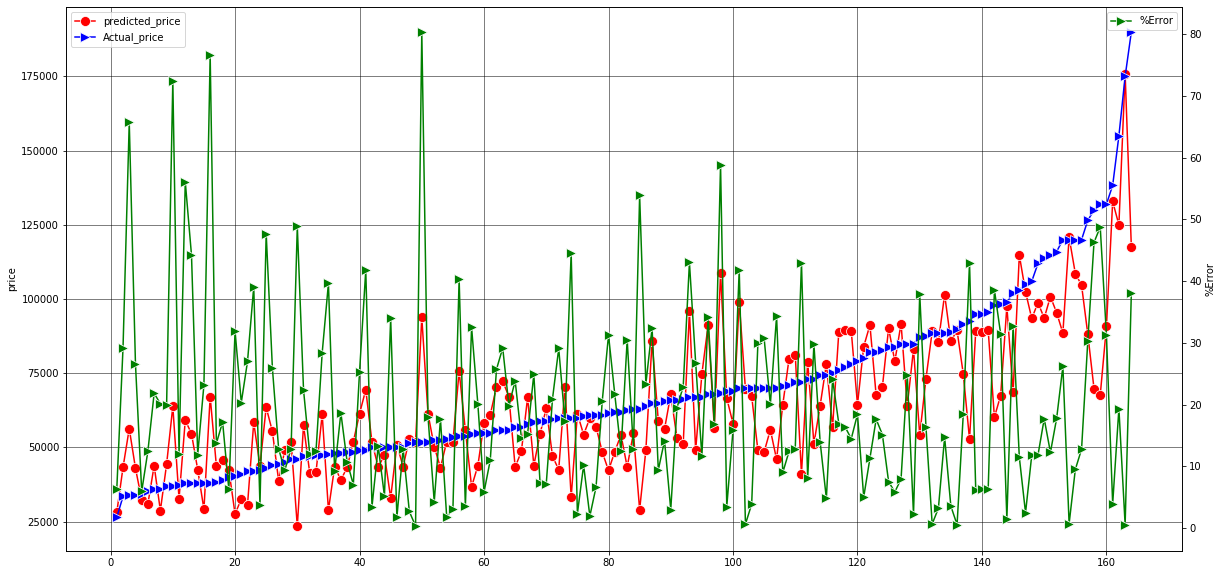

In [26]:
test_results['%Error'] = abs(test_results['predicted_price']-test_results['price'])/test_results['price']*100
plt.figure(figsize=(20,10))
ax =sns.lineplot(y='predicted_price',x=np.arange(1,len(test_results)+1,1),data=test_results,markers=True,marker='o',color='red',ms=10,label='predicted_price')
_=sns.lineplot(y='price',x=np.arange(1,len(test_results)+1,1),data=test_results,markers=True,marker='>',color='blue',ms=10,label='Actual_price')
ax2=ax.twinx()
_=sns.lineplot(y='%Error',x=np.arange(1,len(test_results)+1,1),ax=ax2,data=test_results,markers=True,marker='>',color='green',ms=10,label='%Error')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')

,lotsize,driveway,recroom,fullbase,gashw,airco,prefarea,bedrooms,bathrms,stories,garagepl,price,predicted_price,%Error
164,-1.034205,0,0,0,0,0,0,0.047235,-0.569495,-0.931157,-0.804525,25000.0,28737.093750,14.948375
166,-0.706438,1,0,0,0,0,0,-1.310147,-0.569495,-0.931157,-0.804525,25000.0,43271.339844,73.085359
165,-0.600260,1,0,0,0,0,0,0.047235,-0.569495,0.221704,-0.804525,25000.0,43467.628906,73.870516
167,-1.269643,0,0,0,0,0,0,0.047235,-0.569495,-0.931157,-0.804525,25245.0,29198.375000,15.660032
168,-0.992657,1,0,1,0,0,0,-1.310147,-0.569495,-0.931157,1.519658,26000.0,48401.695312,86.160367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1.047809,1,1,1,0,1,0,1.404617,-0.569495,0.221704,1.519658,163000.0,97509.828125,40.178020
544,1.084740,1,0,1,0,1,1,1.404617,1.423737,0.221704,2.681750,174500.0,130255.453125,25.355041
545,2.220384,1,0,1,0,0,1,0.047235,1.423737,0.221704,1.519658,175000.0,101319.695312,42.103031
162,1.758740,1,0,0,0,1,0,1.404617,5.410201,2.527427,2.681750,175000.0,175943.468750,0.539125


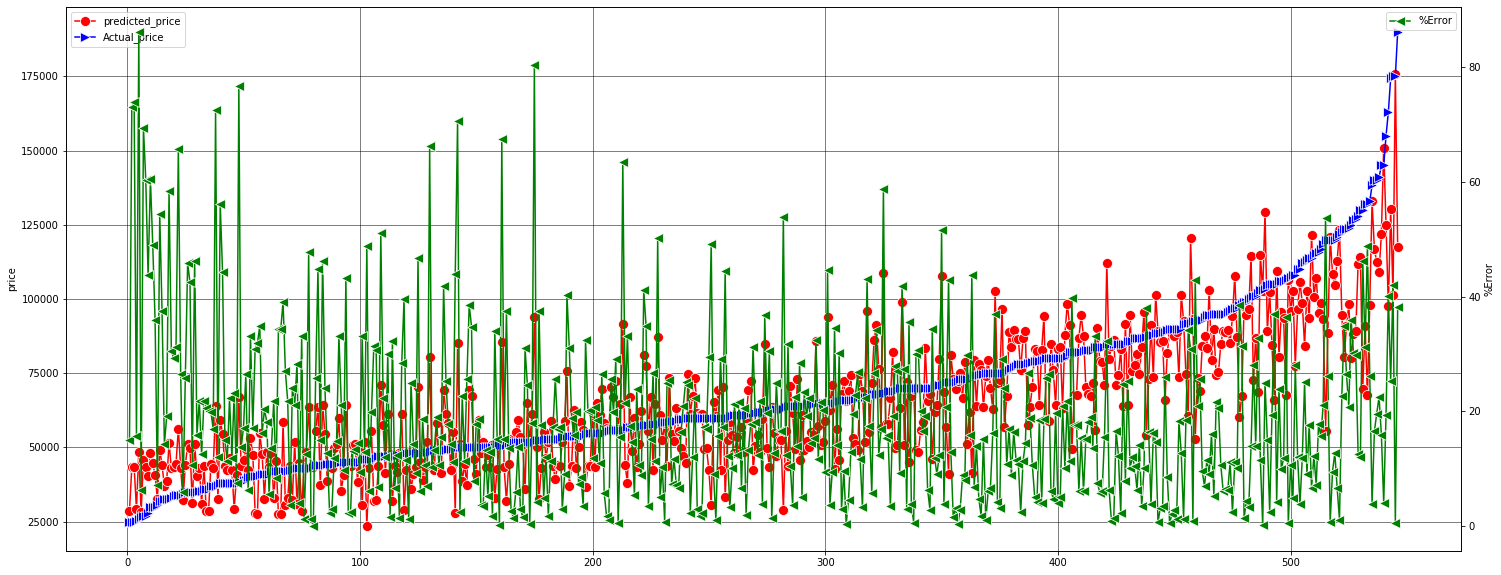

In [27]:
training_results['%Error'] = abs(training_results['predicted_price']-training_results['price'])/training_results['price']*100
tallied_results = pd.concat([test_results,training_results],axis=0,ignore_index=True)
tallied_results = tallied_results.sort_values(by=['price'])

plt.figure(figsize=(25,10))
ax =sns.lineplot(y='predicted_price',x=np.arange(1,len(tallied_results)+1,1),data=tallied_results,markers=True,marker='o',color='red',ms=10,label='predicted_price')
_=sns.lineplot(y='price',x=np.arange(1,len(tallied_results)+1,1),data=tallied_results,markers=True,marker='>',color='blue',ms=10,label='Actual_price')
ax2=ax.twinx()
_=sns.lineplot(y='%Error',x=np.arange(1,len(tallied_results)+1,1),ax=ax2,data=tallied_results,markers=True,marker='<',color='green',ms=10,label='%Error')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
tallied_results

### Model Save
Model can be saved with its tuned weights,biases imported and be used for predicting with new data.
New Data however has to be scaled using the the same feature scaling parameters to get relevant results. 

In [28]:
model.save('windsor_housing_predictor_v1.h5')

In [29]:
from keras.models import load_model
loaded_model=load_model('windsor_housing_predictor_v1.h5')

In [30]:
example=[-1.034205,0,0,0,0,0,0,0.047235,-0.569495,-0.931157,-0.804525]
example = np.array(example).reshape(1,11)
example_results = loaded_model.predict(example)
actual_price = 25000.0
print(actual_price,example_results)

25000.0 [[28737.094]]


## END ##

In [ ]:
tallied_results.loc[tallied_results['%Error']>=30,'Error Class']=1
tallied_results.loc[tallied_results['%Error']<30,'Error Class']=0
%matplotlib qt
_=sns.pairplot(tallied_results,hue='Error Class')

C:\Users\jk113\Anaconda3\envs\ML\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jk113\Anaconda3\envs\ML\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [ ]:
#'bedrooms', 'bathrms','stories','garagepl'
#ori_tallied_results = stdscaler.inverse_transform(tallied_results[['bedrooms', 'bathrms','stories','garagepl']])
#ori_tallied_results = pd.DataFrame(ori_tallied_results,columns=['bedrooms', 'bathrms','stories','garagepl'])
#tallied_results=tallied_results.drop(columns=['bedrooms', 'bathrms','stories','garagepl'],axis=1)
#ori_tallied_results=pd.concat([ori_tallied_results,tallied_results],axis=1)
ori_tallied_results
print(ori_tallied_results.groupby('Error Class')['bedrooms'].value_counts())
print(ori_tallied_results.groupby('Error Class')['bathrms'].value_counts())
print(ori_tallied_results.groupby('Error Class')['stories'].value_counts())
print(ori_tallied_results.groupby('Error Class')['garagepl'].value_counts())

In [ ]:
_=sns.pairplot(ori_tallied_results,hue='Error Class')

In [ ]:
Binary_Features2 = housing_data[['driveway','recroom','fullbase','gashw','airco','prefarea','Class']]
Int_Features2 = housing_data[['bedrooms','stories','garagepl']]
Cont_Features2 = housing_data[['lotsize']]
Target2=housing_data['price']
print(Binary_Features2,Int_Features2,Cont_Features2,Target2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
Lencoder = LabelEncoder()

In [ ]:
Binary_Features2.columns
Encoded_Binary_Features2=[]

for i in Binary_Features2.columns:
    Binary_Features_Temp2 = Lencoder.fit_transform(Binary_Features2[i])
    Encoded_Binary_Features2.append(Binary_Features_Temp2)

Encoded_Binary_Features2 = pd.DataFrame(Encoded_Binary_Features2,index = Binary_Features2.columns)
Encoded_Binary_Features2 = Encoded_Binary_Features2.T
Encoded_Binary_Features2

In [ ]:
stdscaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

mmscaler = MinMaxScaler()
qtscaler = QuantileTransformer()
pscaler = PowerTransformer()
rscaler = RobustScaler()

Cont_Features2 = stdscaler.fit_transform(Cont_Features2)
Cont_Features2 = pd.DataFrame(Cont_Features2,columns=['lotsize'])
Int_Features2 = stdscaler.fit_transform(Int_Features2)
Int_Features2 = pd.DataFrame(Int_Features2,columns=['bedrooms','stories','garagepl'])

In [ ]:
Final_Scaled_Features2 = pd.concat([Cont_Features2,Encoded_Binary_Features2,Int_Features2],axis=1)
print(Final_Scaled_Features2,Target2)

In [ ]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(Final_Scaled_Features2,Target2,test_size=0.3,random_state=24,stratify=Final_Scaled_Features['Class'])
print(X_train2['Class'].value_counts(),X_test2['Class'].value_counts())

In [ ]:
X_train2 = X_train2.drop(columns='Class',axis=1)
X_test2 = X_test2.drop(columns='Class',axis=1)
print(X_train2,X_test2)

In [ ]:
training_log_database2=[]
   
#model_architecture
optimizer = optimizers.Nadam(lr=0.01)
model=Sequential()
input_layer_nodes=X_train2.shape[1]
model.add(Dense(16,activation='relu',input_shape=(input_layer_nodes,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1))  

#model compile
earlystop = EarlyStopping(patience=5, verbose=1)
model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mae'])

#model fitting
training_history=model.fit(X_train2,y_train2,validation_split=0.3,epochs=200,callbacks=[earlystop])
training_log = pd.DataFrame.from_dict(training_history.history)
training_log['epochs']=np.arange(1,len(training_log)+1)
training_log=training_log[['epochs','loss','mean_absolute_error','val_loss','val_mean_absolute_error']]
#training_log_database.append(training_log)
training_log_database2.append(training_log)
    
training_log_database2= pd.concat(training_log_database2,ignore_index=True)

In [ ]:
training_log_database2.loc[training_log_database2['val_loss']==training_log_database2['val_loss'].min()]